In [7]:
import os
import re
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = os.path.join('..', 'data')

In [73]:
train = pd.read_pickle(os.path.join(DATA_DIR, 'train_df.pkl'))
test = pd.read_pickle(os.path.join(DATA_DIR, 'test_df.pkl'))

In [8]:
def clear_text(text):
    text = re.sub("\n|\r|\t", " ", text)
    text = re.sub("[^\w\s]", " ", text)
    text = re.sub(" +"," ", text.strip())
    return text

def make_one_text(texts):
    final_text = ""
    
    for text in texts:
        final_text += clear_text(text) + " "
    
    return final_text.strip()


train["clear_text"] = train["text"].apply(make_one_text)

In [71]:
train['text']

0        [Release\n2020\n2019\n2018\n2017\n2020\n2019\n...
1        [SAP Integrated Business Planning (IBP)\nSAP A...
2        [facebook\ntwitter\nlinkedin\ninstagram\nWelco...
3        [ANDERSON BUSINESS TRAVEL\nSpecialist Independ...
4        [Amari Ireland Ltd\nStandards\nPeople\nQuality...
                               ...                        
15510    [About Thule Group\nStrategic building blocks\...
15511    [Solutions\nEnterprise\nBank\nConstruction\nSc...
15512    [[wpml_language_switcher]\nSearch\nCompany\nCo...
15513    [HOME About AIT\nAIT is an integrated logistic...
15514    [Contact\nLocations\nExtranet\nSkip navigation...
Name: text, Length: 15515, dtype: object

In [74]:
test['text']

0       [We use cookies to tailor our service and ensu...
1       [About us\nAbout Powernet\nPartnerships\nCusto...
2       [Work\nApproach\nPeople\nValues\nBlog\nCareers...
3       [Menu\nMenu\nSupport\nInfrastructure\nColocati...
4       [Français (French)\nEnglish (English)\n日本語 (Ja...
                              ...                        
4371    [About us\nOur Brands\nAbout Tarsago\nOur Bran...
4372    [Tableware back\nAlumina Vitrified\nAlumina Vi...
4373    [Component Solutions\nDefence Products\nSupply...
4374    [Much more than chartered accountants\nfr\nen\...
4375    [Skip to main content\nfacilitates sustainable...
Name: text, Length: 4376, dtype: object

In [77]:
tt = list(train['text']) + list(test['text'])

In [78]:
len(tt)

19891

In [11]:
train['text'][1]

['SAP Integrated Business Planning (IBP)\nSAP Advanced Planning & Optimization (APO)\nPP/DS for SAP S/4HANA\nSAP Digital Manufacturing Cloud (DMC)\nSAP Manufacturing Intelligence and Integration (MII)\nSAP Analytics Cloud (SAC)\nSAP BW 4HANA\nSAP Business Planning and Consolidation (BPC)\nSAP S/4HANA Cloud\nSAP S/4 HANA\nPP/DS for SAP S/4HANA\nABOUT US\nAbout Us\nBLOG\nTALENT\nCONTACT\nIdioma\nShare\nBuscador\nes\nTwitter\nLinkedin\nContactar\nThe Best adjustment of plans and forecasts\nSAP BPC- Business Planning and Consolidation\nSAP Business Planning and Consolidation (SAP BPC) offers planning, budgeting, simulation and financial and legal consolidation capabilities. In this way you can easily generate plans and forecasts, accelerate the budget and closing cycles, and ensure compliance with financial regulations.\nAvailable on-premise and Cloud\nIntegration of SAP data and external data\nReal-time access to data in SAP S/4 HANA\nHybrid implementation with SAP Analytics Cloud\nVersio

In [12]:
train['clear_text'][1]

'SAP Integrated Business Planning IBP SAP Advanced Planning Optimization APO PP DS for SAP S 4HANA SAP Digital Manufacturing Cloud DMC SAP Manufacturing Intelligence and Integration MII SAP Analytics Cloud SAC SAP BW 4HANA SAP Business Planning and Consolidation BPC SAP S 4HANA Cloud SAP S 4 HANA PP DS for SAP S 4HANA ABOUT US About Us BLOG TALENT CONTACT Idioma Share Buscador es Twitter Linkedin Contactar The Best adjustment of plans and forecasts SAP BPC Business Planning and Consolidation SAP Business Planning and Consolidation SAP BPC offers planning budgeting simulation and financial and legal consolidation capabilities In this way you can easily generate plans and forecasts accelerate the budget and closing cycles and ensure compliance with financial regulations Available on premise and Cloud Integration of SAP data and external data Real time access to data in SAP S 4 HANA Hybrid implementation with SAP Analytics Cloud Versions available for SAP BW 4HANA SAP S 4 HANA SAP NetWeav

In [15]:
!pip install spacy

     |████████████████████████████████| 10.5MB 5.0MB/s eta 0:00:01
     |████████████████████████████████| 61kB 5.0MB/s eta 0:00:011
     |████████████████████████████████| 2.2MB 2.3MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/86/85/40b8f66c2dd8f4fd9f09d59b22720cffecf1331e788b8a0cab5bafb353d1/plac-1.1.3-py2.py3-none-any.whl
     |████████████████████████████████| 215kB 2.9MB/s eta 0:00:01
     |████████████████████████████████| 184kB 12.1MB/s eta 0:00:01
     |████████████████████████████████| 61kB 9.1MB/s eta 0:00:01
     |████████████████████████████████| 4.0MB 5.2MB/s eta 0:00:01
  Found existing installation: tqdm 4.36.1
    Uninstalling tqdm-4.36.1:
      Successfully uninstalled tqdm-4.36.1


In [22]:
!python -m spacy download en

     |████████████████████████████████| 12.0MB 3.4MB/s eta 0:00:01    |████████                        | 3.0MB 359kB/s eta 0:00:26
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-cp37-none-any.whl size=12011740 sha256=377f853595330f1a467b5a3c8e89e9518fa55c7271631acde89194827e170546
  Stored in directory: /private/var/folders/x1/2lncpj1x0xl2fks4286z84k00000gn/T/pip-ephem-wheel-cache-2eln3rt6/wheels/6a/47/fb/6b5a0b8906d8e8779246c67d4658fd8a544d4a03a75520197a
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/nazariinyzhnyk/anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
/Users/nazariinyzhnyk/anaconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [27]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [25]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [33]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [65]:
from sklearn.model_selection import train_test_split

X = train['clear_text'] # the features we want to analyze
ylabels = train['target'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [67]:
X_emb = X
X_emb = [clean_text(text) for text in X_emb]
X_emb = bow_vector.fit_transform(X_emb)


In [70]:
X_emb.shape[1]

166079

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

/Users/nazariinyzhnyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nazariinyzhnyk/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/nazariinyzhnyk/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x1a666cda50>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 tok...?u)\\b\\w\\w+\\b',
                                 tokenizer=<function spacy_tokenizer at 0x15a669a70>,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
            

In [36]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Accuracy: 0.7591836734693878


(array([ 174.,    0.,    0.,    0.,    0., 4088.,    0.,    0.,    0.,
         393.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

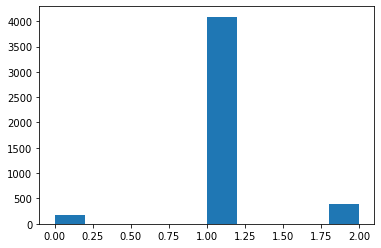

In [42]:
plt.hist(predicted)

In [52]:
weights = [2 if y == 2 else 1 for y in y_test]

In [53]:
sum(weights)

5567

In [54]:
len(y_test)

4655

In [62]:
weights = [2 if y == 2 else 1 for y in y_test]
np.sum(weights * (y_test == predicted)) / sum(weights)

0.6763068079755703

In [64]:
X

9284     Web Services redirection server Page This is t...
2762     Skip to content Wunder Wunder Suomi Search Clo...
12339    Go to menu Go to content Go to search Extranet...
12562    Your Saved Items Too many items added to your ...
1044     Login or Register Order Coal Online Skip to co...
                               ...                        
2603     History Team Services Clients Success Certific...
13954    Unit 8 Mole Business Park Randalls Road Leathe...
8418     Analyse Cleanse Migrate Manage Archiving Traci...
10456    Skip to content CIDI Group CIDI Services CIDI ...
6982     History Governance Services Liquefied Natural ...
Name: clear_text, Length: 10860, dtype: object

In [80]:
test

,id,html,text,keywords,accepted_function,rejected_function,accepted_product,rejected_product
0,071c2e15-5fd0-4e7d-b78d-26b7c34491e1,"[b'<!DOCTYPE html>\r\n<html id=""ctl00_htmlMast...",[We use cookies to tailor our service and ensu...,"[technologies, descriptive, mapping, learning,...","IT support, IT managed services, IT integratio...","manufacture, production, processing, distribut...",,
1,e534df73-b385-4a12-8368-38992d3af7d3,"[b'\n<!DOCTYPE html>\n\n<html lang=""en-US"">\n\...",[About us\nAbout Powernet\nPartnerships\nCusto...,"[outsourcing, projects, IT, sensors, convergen...","software development, database development, sy...","wholesale, distribution, retail selling, manuf...",,
2,4e38c9ff-bffe-4251-b2b2-94777c7344fe,[b'<!--\n.----------------. .----------------...,[Work\nApproach\nPeople\nValues\nBlog\nCareers...,"[Inventing, products, risk, development, servi...","general accounting, auditing, book keeping act...","manufacture, production, processing, distribut...",,
3,a7f8870c-30f8-4851-8f8b-4c16942b397f,[b'<!DOCTYPE html>\n<!--[if lt IE 7]><html cla...,[Menu\nMenu\nSupport\nInfrastructure\nColocati...,"[low, chain, portfolio, services, Procurement,...","Investment research and information services, ...","Construction, production and supply, Advertisi...",,
4,c062f411-ae3e-486a-9cba-2267889adb2b,"[b'<!DOCTYPE html><html lang=""en-US""><head><me...",[Français (French)\nEnglish (English)\n日本語 (Ja...,"[recruitment, producing, Evaluation, Payroll, ...","general accounting, auditing, book keeping act...","manufacture, production, processing, distribut...",,
...,...,...,...,...,...,...,...,...
4371,f91cfa0f-5157-4164-ab81-74600fce132d,[b'<!DOCTYPE html>\n<html>\n\t<head>\n\t\t<met...,[About us\nOur Brands\nAbout Tarsago\nOur Bran...,"[ad, tools, text, harsh, services, multimedia,...","accounting, auditing, taxation, book keeping a...","manufacture, production, processing, distribut...",,
4372,9e7059e5-7fc5-42d9-ba12-9812aa0f8668,[b'<!DOCTYPE html>\n<!--[if lt IE 7]> <html cl...,[Tableware back\nAlumina Vitrified\nAlumina Vi...,"[coffee, Tiered, produces, buses, Trays, Deliv...","wholesale, distribution, trade, sale, import, ...","manufacture, production, construction, develop...","product, ceramic products, bearings, carbon, s...","product, fertilizers (standalone basis), pesti..."
4373,3a6f84ca-f796-4b5d-8125-d4e285b65004,"[b'<!doctype html>\n<html xmlns:og=""http://ope...",[Component Solutions\nDefence Products\nSupply...,"[global, counterfeit, components, assemblies, ...","distribution, sale, supply, import, export, tr...","manufacture, production, retail sale, research...","product, electrical products, electrical equip...","product, electricity, household appliances, fo..."
4374,bbff5d3d-634e-4db9-b134-3f86355089ce,"[b'<!doctype html>\n<html class=""no-js"" lang=""...",[Much more than chartered accountants\nfr\nen\...,"[transaction, services, negotiating, assist, c...","management and business consultancy, general a...","manufacture, production, processing, distribut...",,


In [81]:
predicted

array([1, 1, 1, ..., 1, 1, 1])

In [82]:
len(train)

15515